In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten

import os
from tqdm import tqdm
from sklearn import preprocessing
import cv2
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Inspecting train data set

In [75]:
training_dir = '../inputs/train/'
train = pd.read_csv('../inputs/train.csv')
data.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


In [76]:
train_x_raw = train.Image
train_y_raw = train.Id
train_X, valid_X, train_y, valid_y = train_test_split(train_x_raw, train_y_raw, test_size=0.3, random_state=1)
train_y_raw = np.array(train_y, np.str)
num_class = train_y_raw.shape[0]
print('checking valid sets shapes', valid_X.shape, valid_y.shape)
print('checking train sets shape', train_X.shape, train_y.shape)

checking valid sets shapes (2955,) (2955,)
checking train sets shape (6895,) (6895,)


In [77]:
print(train_X.shape)
print(train_y.shape)
print(train_y_raw.shape[0])

(6895,)
(6895,)
6895


In [78]:
# Parameters
im_size = 90

## Utility scripts

In [79]:
def process_image(name):
    x = mpimg.imread(training_dir + name)
    # resize
    image = np.resize(image, [128, 128])

    

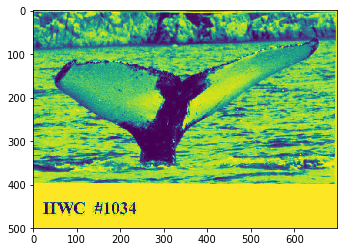

In [80]:
# plt.imshow(x)  
# plt.show()

## Model construction

In [81]:
# Create the base pre-trained model
# Can't download weights in the kernel
base_model = VGG19(
    weights='imagenet',
    #weights = 'None',
    include_top=False, input_shape=(im_size, im_size, 3))

# Add a new top layer
x = base_model.output
x = Flatten()(x)
print('checking num class ', num_class)
predictions = Dense(num_class, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]


base_model.summary()

checking num class  6895
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 90, 90, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 90, 90, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 90, 90, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 45, 45, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 45, 45, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 45, 45, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 22, 22, 128)   

## Model train

In [82]:
model.fit(train_X, train_y, epochs=1, validation_data=(valid_X, valid_y), verbose=1)

ValueError: Error when checking input: expected input_9 to have 4 dimensions, but got array with shape (6895, 1)